In [35]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from unidecode import unidecode 
import string_utils
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import RSLPStemmer

### Primeira Parte 

In [46]:
dados = pd.DataFrame({'anomesdia':[20191201,20191202,20191202,20191202,20200113,20200312,20200312,20200312,
                                  20200404,20200421,20200113,20200113],
                     'segmento':['Empresas','Empresas','Empresas','Empresas','Empresas','Empresas',
                                 'Empresas','Empresas','Empresas','Empresas','Empresas','Empresas'],
                     'situacaoproposta': ['Aceitou','Aceitou','Recusou','Remarcou','Remarcou','Remarcou',
                                         'Aceitou', 'Recusou', 'Recusou','Recusou','Recusou','Recusou']})

In [47]:
dados.head()

,anomesdia,segmento,situacaoproposta
0,20191201,Empresas,Aceitou
1,20191202,Empresas,Aceitou
2,20191202,Empresas,Recusou
3,20191202,Empresas,Remarcou
4,20200113,Empresas,Remarcou


In [48]:
dados['anomesdia']=dados['anomesdia'].apply(str)

In [49]:
def anomes(obs):
    return obs[:6]

In [50]:
dados['anomesdia'].apply(anomes)

0     201912
1     201912
2     201912
3     201912
4     202001
5     202003
6     202003
7     202003
8     202004
9     202004
10    202001
11    202001
Name: anomesdia, dtype: object

In [51]:
dados['anomesdia'].value_counts()

20200312    3
20191202    3
20200113    3
20191201    1
20200404    1
20200421    1
Name: anomesdia, dtype: int64

### Segunda Parte

In [2]:
df = pd.read_csv("http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0")

/home/ana/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190715155027,2019-07-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20190715155027,2019-07-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.09
2,31560,https://www.airbnb.com/rooms/31560,20190715155027,2019-07-16,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.37
3,35636,https://www.airbnb.com/rooms/35636,20190715155027,2019-07-16,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.29
4,35764,https://www.airbnb.com/rooms/35764,20190715155027,2019-07-16,COPACABANA SEA BREEZE - RIO,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,t,f,strict_14_with_grace_period,f,t,1,1,0,0,2.83


In [9]:
df.shape  # dimensão da base

(35451, 106)

In [10]:
df['summary'] # coluna de interesse

0        Please note that special rates apply for Carni...
1        Our apartment is a little gem, everyone loves ...
2        This nice and clean 1 bedroom apartment is loc...
3        This cosy apartment  is just a few steps away ...
4        Our newly renovated studio is located in the b...
                               ...                        
35446    Single room with a single mattress, can be pla...
35447    Moro sozinha com dois gatos carinhosos e manso...
35448    This apartment comes with 2 bedrooms, a flat-s...
35449    Nosso apartamento é aconchegante e funcional. ...
35450    Condomínio com segurança 24hrs por dia Mercado...
Name: summary, Length: 35451, dtype: object

In [11]:
df['summary']=df['summary'].apply(str)  # certificando que é tudo string

In [12]:
df['summary']=df['summary'].apply(lambda x: x.lower()) # deixando tudo minusculo 

In [10]:
# concatenar as palavras
#all_summary = " ".join(s for s in df['summary'])

In [19]:
df['summary']=df['summary'].apply(lambda x:unidecode(x)) # removendo caracteres especiais 

In [24]:
pst=PunktSentenceTokenizer()
df['summary']=df['summary'].apply(lambda x:pst.tokenize(x))

In [26]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /home/ana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
txt = [s for s in df['summary'] if s not in stopwords]

In [43]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(txt)

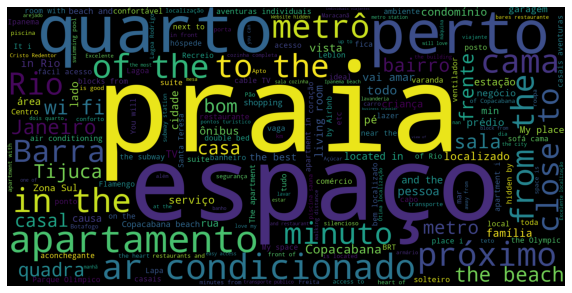

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")